In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
file_to_read = open('D_origin.pickle', 'rb')
tmp = pickle.load(file_to_read)
data = tmp.values

In [3]:
X_train = data[:, :-1]
X_train.shape

(186, 2251)

In [4]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
max(X_train[1])

1.0

In [6]:
y = pd.get_dummies(tmp.iloc[:,-1])
label = data[:, -1]

In [7]:
print(label)

['PUTYAE' 'PUTYEI' 'IDIWOH03' 'IDIWOH04' 'IDIWOH05' 'IDIWOH06' 'LUYNAU'
 'RIDKOE' 'AENCESE10' 'BACHMOH' 'BACMOH10' 'BIMDEF' 'BIMDIL' 'CIDNIM'
 'LITHUR' 'DEFKUU' 'DEHFUR' 'EDIKEH' 'ENCDBZ01' 'ENCUCC10' 'ETCUCY10'
 'FALLOT' 'REGJIW' 'NICZAA01' 'HIXDOH01' 'HEGCEB' 'JARMEU' 'JARMEU10'
 'JEJFAF' 'JOKXAI' 'JOKXAI10' 'JOKXEM' 'JOKXEM10' 'JOKXOW' 'JOKXOW10'
 'JOKXUC' 'JOKXUC10' 'JOKYAJ' 'JOKYAJ10' 'JOKYEN' 'JOKYEN10' 'JOKYIR'
 'JOKYIR10' 'JOKYOX' 'JOKYOX10' 'JOSNAG' 'KECRAL10' 'KEGZOL01' 'KEXFIC10'
 'KUSZED' 'LAMFEK' 'LAMFIO' 'LAMFOU' 'LAMGUB' 'LAMHAI' 'LATCEO' 'LATCIS'
 'LEJBUX' 'PIZJEN' 'PUWCEP' 'PUWCUF' 'RAFRUL' 'RASGAT' 'REVSOA' 'RONZID'
 'SAJRAW10' 'GORQAF' 'SUDBOI' 'TENQOS' 'TILVOZ' 'TILVUF' 'TILWAM' 'TILWEQ'
 'LORNEL' 'WILRIS' 'YARYEV' 'YEFNIG' 'YEFPAA' 'YEFPUU' 'YUTGEZ' 'ZIWTII'
 'ZUTBAR' 'ZUVTEP' 'ZUYWAR' 'NUMMOX' 'HODWUS' 'QEFNAQ' 'MINVUA02' 'QALWUV'
 'MAXFIA' 'QOJTUE' 'QOJVAM' 'DOQRUW' 'QAMXIL' 'GUJVAI' 'QIJLAW' 'WIWQOI'
 'WIWQUO' 'IDIWOH07' 'QAYTOZ' 'XAYMUF' 'QOJKAB' 'XANXUF' 'CUIM

In [8]:
# file_to_read1 = open('T_origin.pickle', 'rb')
# tmp1 = pickle.load(file_to_read1)
# test_data = tmp1.values

Test = pd.read_csv('test_data.csv')
X_test = Test.iloc[:,1:]
# X_test = scaler.transform(Test.iloc[:,1:])

In [44]:
X_test = np.array(X_test)
max(X_test[1])

1.0

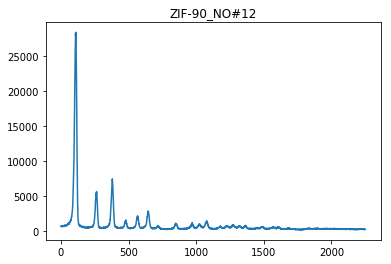

In [9]:
num = 12
x1 = np.linspace(0, 2251,num=2251)
y1 = test_data[num,:-1]
#y1.shape
plt.title(test_data[num,-1]+'_NO#' + str(num))
plt.plot(x1, y1)
plt.show()

In [9]:
y_train = pd.get_dummies(tmp.iloc[:,:]['label'])

names = y_train.columns
mapping = {}
i = 0
for n in names:
    mapping[i] = n
    i+=1
# y_train.shape

In [10]:
from sklearn import neighbors
import sklearn

In [11]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [12]:
predict_list = []
for i in range(14):
#     predict = knn.predict([test_data[i,:-1]])
    predict = knn.predict(X_test)
    
    predict_list.append(predict)

In [16]:
predict_list = (np.array(predict_list)).reshape(13,-1)

In [17]:
predict_list

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [18]:
out = [np.argmax(p) for p in predict_list]
out = np.array(out)
predicted = np.vectorize(mapping.get)(out)
print(predicted)

['JARMEU10' 'JARMEU10' 'JARMEU10' 'AFEHUO' 'AFEHUO' 'AFEHUO' 'ZIF-90'
 'ZIF-90' 'ZIF-90' 'ZIF-90' 'DUT-23' 'ZIF-90' 'DUT-23']


In [60]:
test_data[:,-1]

array(['ZIF-67', 'ZIF-67', 'ZIF-67', 'ZIF-67', 'ZIF-71', 'ZIF-71',
       'ZIF-71', 'ZIF-8', 'ZIF-8', 'ZIF-8', 'ZIF-8', 'ZIF-90', 'ZIF-90',
       'ZIF-90'], dtype=object)

# 画出所有的测试数据图

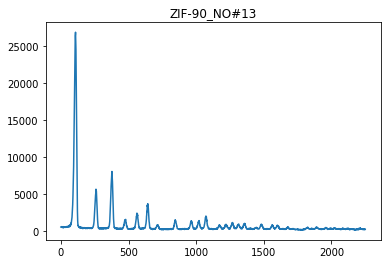

In [26]:
x1 = np.linspace(0, 2251,num=2251)
y1 = test_data[13,:-1]
#y1.shape
plt.title(test_data[13,-1]+'_NO#13')
plt.plot(x1, y1)
plt.show()

# 画出所有的模拟数据图

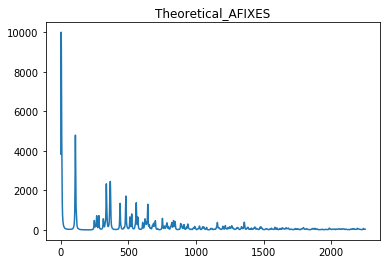

In [41]:
x1 = np.linspace(0, 2251,num=2251)
y1 = None
for i in range(186):
    if data[i, -1] == 'AFIXES':
        y1 = data[i, :-1]
#y1.shape
plt.title('Theoretical_AFIXES')
plt.plot(x1, y1)
plt.show()